### LAB 4
### R S Harish Kumar (AM.EN.U4AIE22042)

**Problem 1**:
Find the distance between a pattern and a set of strings.<br>
**Given**: A DNA string Pattern and a collection of DNA strings Dna.<br>
**Return**: DistanceBetweenPatternAndStrings(Pattern, Dna).

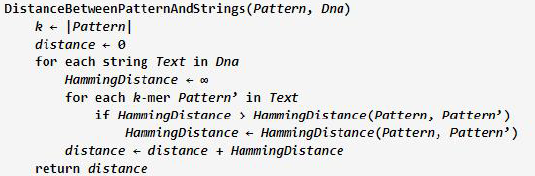

**Sample Dataset**

AAA

TTACCTTAAC GATATCTGTC ACGGCGTTCG CCCTAAAGAG 
CGTCAGAGGT

**Sample Output**

5

In [1]:
def HammingDistance(Pattern,pattern):
    count=0
    for i in range(len(pattern)):
        if(pattern[i]!=Pattern[i]):
            count+=1
    return count 

In [2]:
def DistanceBetweenPatternandStrings(Pattern,dna):
    k=len(Pattern)
    distance=0
    for i in dna:
        hammingdistance=float('inf')
        for j in range(len(i)-k+1):
            pattern=i[j:j+k]
            if(hammingdistance > HammingDistance(Pattern,pattern)):
                hammingdistance=HammingDistance(Pattern,pattern)
        distance=distance+hammingdistance
    return distance

In [3]:
Pattern='AAA'
dna=['TTACCTTAAC','GATATCTGTC','ACGGCGTTCG','CCCTAAAGAG','CGTCAGAGGT']
print("The distance is",DistanceBetweenPatternandStrings(Pattern,dna))

The distance is 5


**Problem 2** :

Implement Brute Force Motif Search for a set of DNA strings.

Given a collection of strings Dna and an integer d, a k-mer is a **(k,d)-motif** if it appears in
every string from Dna with at most d mismatches. The following algorithm finds (k,d)-
motifs.

**Implanted Motif Problem**

Implement MotifEnumeration (shown above) to find all (k, d)-motifs in a collection of strings.

**Given**: Integers k and d, followed by a collection of strings Dna.

**Return**: All (k, d)-motifs in Dna.

**Sample Dataset**

3 1

ATTTGGC

TGCCTTA

CGGTATC

GAAAATT

**Sample Output**

ATA ATT GTT TTT

In [4]:
def _isMotif(Dna, motif, d):
    for string in Dna:
        found = False
        for i in range(len(string) - len(motif) + 1):
            mismatches = 0
            for j in range(len(motif)):
                if string[i + j] != motif[j]:
                    mismatches += 1
            if mismatches <= d:
                found = True
                break
        if not found:
            return False
    return True

In [5]:
def _MotifEnumeration(Dna, k, d, i, current_motif, motifs):
    if len(current_motif) == k:
        # Check if current motif is a valid (k, d)-motif
        if _isMotif(Dna, current_motif, d):
            motifs.add("".join(current_motif))
        return

    # Try all possible nucleotides at the current position
    for nucleotide in "ACGT":
        _MotifEnumeration(Dna, k, d, i + 1, current_motif + [nucleotide], motifs)

In [6]:
def MotifEnumeration(Dna, k, d):
    motifs = set() 
    n = len(Dna[0]) 
    for i in range(n - k + 1):
        _MotifEnumeration(Dna, k, d, i, [], motifs)
    return list(motifs) 

In [7]:
dna=['ATTTGGC','TGCCTTA','CGGTATC','GAAAATT']
k=3
d=1
motifs=MotifEnumeration(dna,k,d)
print("The motifs are")
for i in motifs:
    print(i)

The motifs are
ATA
ATT
GTT
TTT


**Problem 3**:

Given a set of ‘t’ DNA Strings, display a Motif Matrix and calculate the corresponding
Count matrix and Profile matrix. Use the profile matrix to form the Consensus string.

Dataset : Use NF-xB binding sites and form consensus **“TCGGGGATTTCC”**

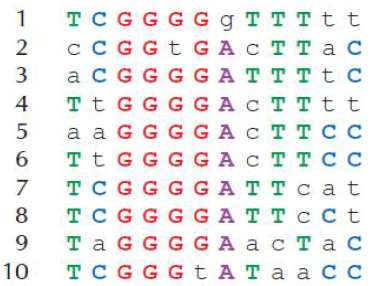

In [8]:
def count_matrix(motifs):
    count = {'A': [], 'C': [], 'G': [], 'T': []}
    k = len(motifs[0])
    for nucleotide in ['A', 'C', 'G', 'T']:
        count[nucleotide] = [0] * k
    for i in range(k):
        for motif in motifs:
            count[motif[i]][i] += 1
    return count

In [9]:
def profile_matrix(motifs):
    counts = count_matrix(motifs)
    profile = {}
    k = len(motifs[0])
    for nucleotide in ['A', 'C', 'G', 'T']:
        profile[nucleotide] = [count / len(motifs) for count in counts[nucleotide]]
    return profile

In [10]:
def consensus_string(profile):

    consensus = ''
    k = len(profile['A'])
    for i in range(k):
        max_freq = -1
        cons_nucleotide = ''
        for nucleotide in ['A', 'C', 'G', 'T']:
            if profile[nucleotide][i] > max_freq:
                max_freq = profile[nucleotide][i]
                cons_nucleotide = nucleotide
        consensus += cons_nucleotide
    return consensus

In [11]:
motifs = ["TCGGGGGTTTTT",
        "CCGGTGACTTAC",
        "ACGGGGATTTTC", 
        "TTGGGGACTTTT", 
        "AAGGGGACTTCC", 
        "TTGGGGACTTCC", 
        "TCGGGGATTCAT", 
        "TCGGGGATTCCT", 
        "TAGGGGAACTAC", 
        "TCGGGTATAACC"]
t = len(motifs)
count_matrix_motifs = count_matrix(motifs)
profile_matrix_motifs = profile_matrix(motifs)
consensus = consensus_string(profile_matrix_motifs)

print("Motif Matrix:")
for motif in motifs:
    print(motif)
print("\nCount Matrix:")
for nucleotide in ['A', 'C', 'G', 'T']:
    print(f"{nucleotide}: {' '.join(map(str, count_matrix_motifs[nucleotide]))}")
print("\nProfile Matrix:")
for nucleotide in ['A', 'C', 'G', 'T']:
    print(f"{nucleotide}: {' '.join(map(str, profile_matrix_motifs[nucleotide]))}")
print("\nConsensus String:", consensus)

Motif Matrix:
TCGGGGGTTTTT
CCGGTGACTTAC
ACGGGGATTTTC
TTGGGGACTTTT
AAGGGGACTTCC
TTGGGGACTTCC
TCGGGGATTCAT
TCGGGGATTCCT
TAGGGGAACTAC
TCGGGTATAACC

Count Matrix:
A: 2 2 0 0 0 0 9 1 1 1 3 0
C: 1 6 0 0 0 0 0 4 1 2 4 6
G: 0 0 10 10 9 9 1 0 0 0 0 0
T: 7 2 0 0 1 1 0 5 8 7 3 4

Profile Matrix:
A: 0.2 0.2 0.0 0.0 0.0 0.0 0.9 0.1 0.1 0.1 0.3 0.0
C: 0.1 0.6 0.0 0.0 0.0 0.0 0.0 0.4 0.1 0.2 0.4 0.6
G: 0.0 0.0 1.0 1.0 0.9 0.9 0.1 0.0 0.0 0.0 0.0 0.0
T: 0.7 0.2 0.0 0.0 0.1 0.1 0.0 0.5 0.8 0.7 0.3 0.4

Consensus String: TCGGGGATTTCC


**Problem 4**:

Given a profile matrix Profile, we can evaluate the probability of every k-mer in a
string Text and find a **Profile-most probable** k-mer in Text, i.e., a k-mer that was most likely
to have been generated by Profile among all k-mers in Text.

For example, *ACGGGGATTACC* is the Profile-most probable 12-mer
in *GGTACGGGGATTACCT*. Indeed, every other 12-mer in this string has probability 0.

In general, if there are multiple Profile-most probable k-mers in Text, then we select the first
such k-mer occurring in Text.

**Profile-most Probable k-mer Problem**
Find a Profile-most probable k-mer in a string.

**Given**: A string Text, an integer k, and a 4 × k matrix Profile.

**Return**: A Profile-most probable k-mer in Text. (If multiple answers exist, you may return
any one.)

**Sample Dataset**

ACCTGTTTATTGCCTAAGTTCCGAACAAACCCAATATAGCCCGAGGGCCT

5

0.2 0.2 0.3 0.2 0.3

0.4 0.3 0.1 0.5 0.1

0.3 0.3 0.5 0.2 0.4

0.1 0.2 0.1 0.1 0.2

**Sample Output**

CCGAG

In [12]:
def profile_most_probable_kmer(text, k, profile):
    max_prob = -1
    most_probable_kmer = ""
    
    for i in range(len(text) - k + 1):
        kmer = text[i:i+k]
        prob = 1
        for j in range(k):
            nucleotide = kmer[j]
            if nucleotide == 'A':
                prob *= profile[0][j]
            elif nucleotide == 'C':
                prob *= profile[1][j]
            elif nucleotide == 'G':
                prob *= profile[2][j]
            elif nucleotide == 'T':
                prob *= profile[3][j]
        if prob > max_prob:
            max_prob = prob
            most_probable_kmer = kmer
    
    return most_probable_kmer

In [13]:
text = "ACCTGTTTATTGCCTAAGTTCCGAACAAACCCAATATAGCCCGAGGGCCT"
k = 5
profile = [
    [0.2, 0.2, 0.3, 0.2, 0.3],
    [0.4, 0.3, 0.1, 0.5, 0.1],
    [0.3, 0.3, 0.5, 0.2, 0.4],
    [0.1, 0.2, 0.1, 0.1, 0.2]]

print(profile_most_probable_kmer(text, k, profile))

CCGAG
